<h1><strong><center>Book Recommendation Engine</center></strong></h1>

<h3>Dataset Description:</h3>

During the last few decades, with the rise of Youtube, Amazon, Netflix and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. As a proof of the importance of recommender systems, we can mention that, a few years ago, Netflix organised a challenges (the “Netflix prize”) where the goal was to produce a recommender system that performs better than its own algorithm with a prize of 1 million dollars to win.

By applying this simple dataset and related tasks and notebooks , we will evolutionary go through different paradigms of recommender algorithms . For each of them, we will present how they work, describe their theoretical basis and discuss their strengths and weaknesses.

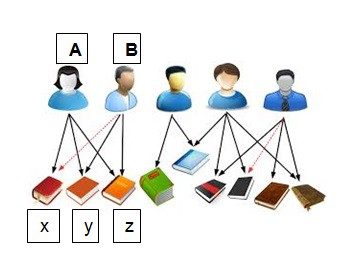

<h3>Content:</h3>

The Book-Crossing dataset comprises 3 files.

<ul>
<li>Users:</li>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-values.

<li>Books:</li>
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon web 
site.

<li>Ratings:</li>
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.
</ul>

<h3>Inspiration</h3>

Apply different paradigm, methods and algorithms to recommand right Books to the right Users, during right Time.

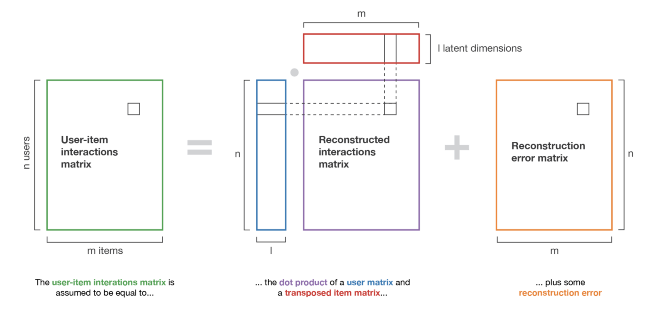

<h2>Importing Libraries</h2>

In [1]:
import numpy as np
import pandas as pd

In [2]:
books=pd.read_csv("Books.csv")
ratings=pd.read_csv("Ratings.csv")
users=pd.read_csv("Users.csv")

C:\Users\pragy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Displaying top 5 head of book dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
#Displaying top 5 head of ratings dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
#Displaying top 5 head of users dataset
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [9]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [10]:
books.duplicated().sum()

0

In [11]:
ratings.duplicated().sum()

0

In [12]:
users.duplicated().sum()

0

<h2>Popularity Based Recommender System</h2>

In [13]:
ratings_with_name=ratings.merge(books,on='ISBN')

In [14]:
num_rating_df=ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num-ratings'},inplace=True)
num_rating_df

,Book-Title,num-ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [15]:
avg_rating_df=ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_ratings'},inplace=True)
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [16]:
popular_df=num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num-ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,4
1,Always Have Popsicles,1,1
2,Apple Magic (The Collector's series),1,1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,1
4,Beyond IBM: Leadership Marketing and Finance ...,1,1
...,...,...,...
241066,Ã?Â?lpiraten.,2,2
241067,Ã?Â?rger mit Produkt X. Roman.,4,4
241068,Ã?Â?sterlich leben.,1,1
241069,Ã?Â?stlich der Berge.,3,3


In [17]:
popular_df=popular_df[popular_df['num-ratings']>=250].sort_values('avg_ratings',ascending=False).head(50)

In [18]:
popular_df=popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num-ratings','avg_ratings']]

In [19]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg'

<h2>Collaborative Filtering Based Recommender System</h2>

In [20]:
x=ratings_with_name.groupby('User-ID').count()['Book-Rating']>200
knowledge_user=x[x].index

In [21]:
filtered_rating=ratings_with_name[ratings_with_name['User-ID'].isin(knowledge_user)]

In [22]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books=y[y].index

In [23]:
final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [24]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [25]:
pt.fillna(0,inplace=True)

In [26]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>Recommender System</h2>

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
similarity_scores=cosine_similarity(pt)

In [29]:
similarity_scores.shape

(706, 706)

In [30]:
def recommend(book_name):
    #index fetch
    index=np.where(pt.index == book_name)[0][0]
    similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    for i in similar_items:
        print(pt.index[i[0]])

In [31]:
recommend('Message in a Bottle')

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


In [32]:
pt.index[545]

"The Handmaid's Tale"